In [1]:
# 라이브러
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 그래프 출력시
import matplotlib as mpl # 그래프 옵션

import seaborn as sns

# 그래프 한글성정
mpl.rc('font', family = 'Malgun Gothic') # 윈도우 사용자 기준
# mpl.rc('font', family = 'AppleGothic') # 맥북 사용자 기준

# 한글을 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수 값이 나올 경우 깨지는 현상을 방비
mpl.rc('axes', unicode_minus = False)

In [2]:
df = pd.read_csv('store_market_data.csv')
print(df.shape)
df.head()

(705571, 20)


,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09


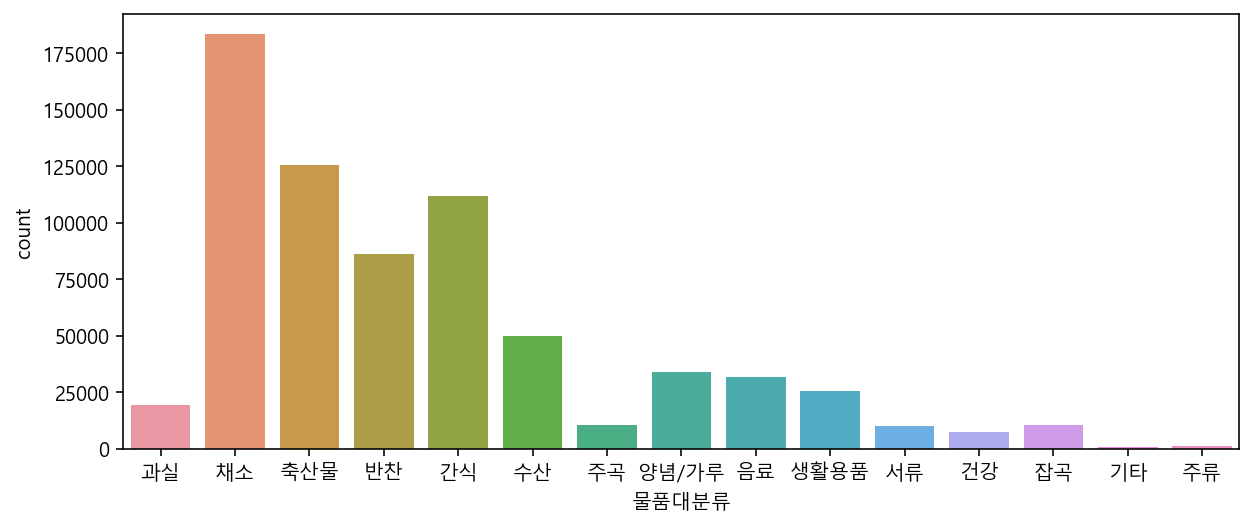

In [6]:
# 1번 문제
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = '물품대분류')
plt.show()

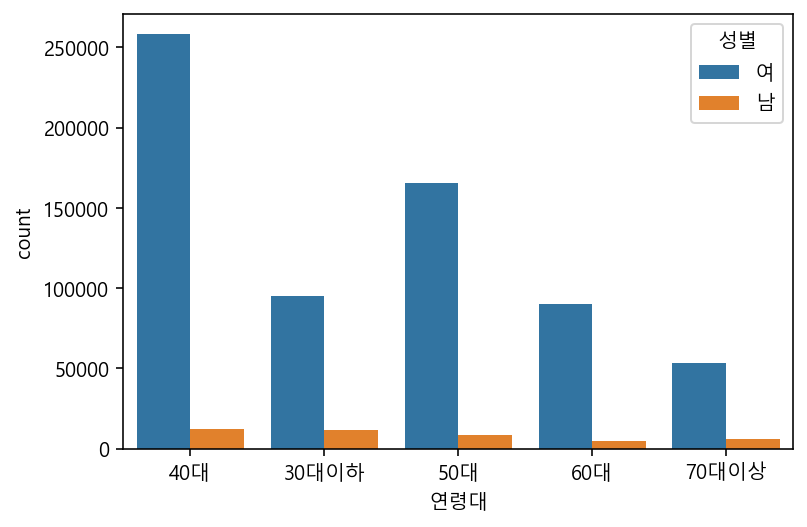

In [8]:
# 2번 문제
sns.countplot(data = df, x = '연령대', hue = '성별')
plt.show()

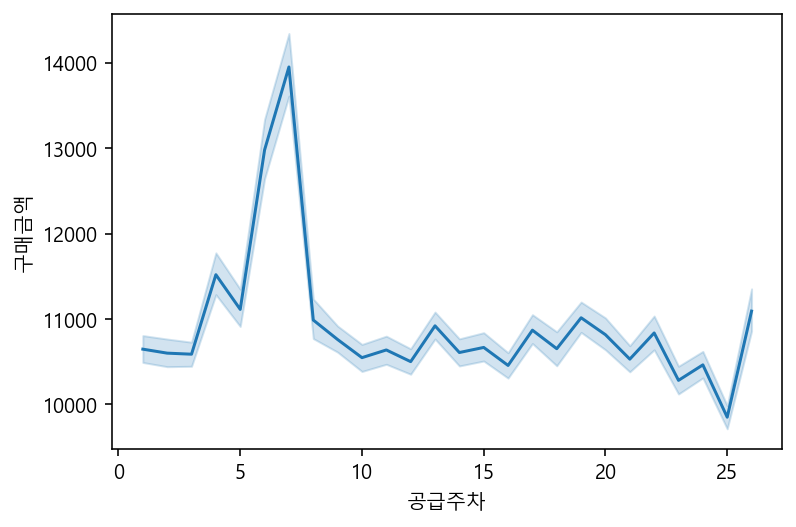

In [10]:
# 3번 문제
sns.lineplot(data = df, x = '공급주차', y = '구매금액')
plt.show()

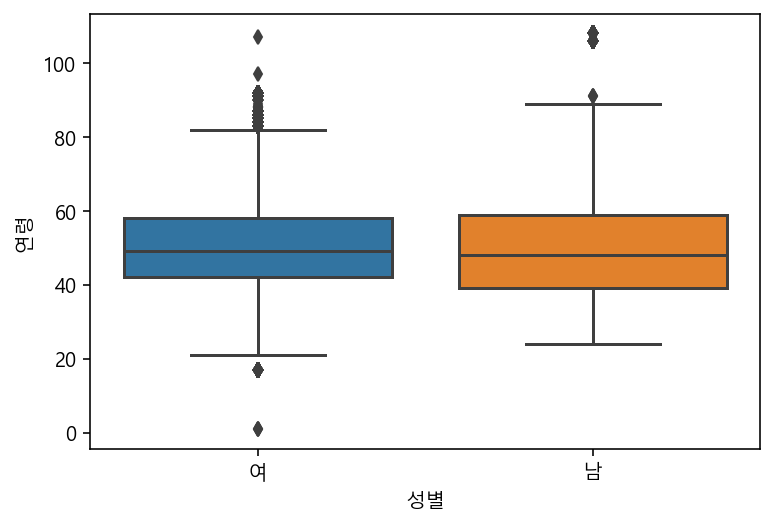

In [12]:
# 4번 문제
sns.boxplot(data = df, x = '성별', y = '연령')
plt.show()

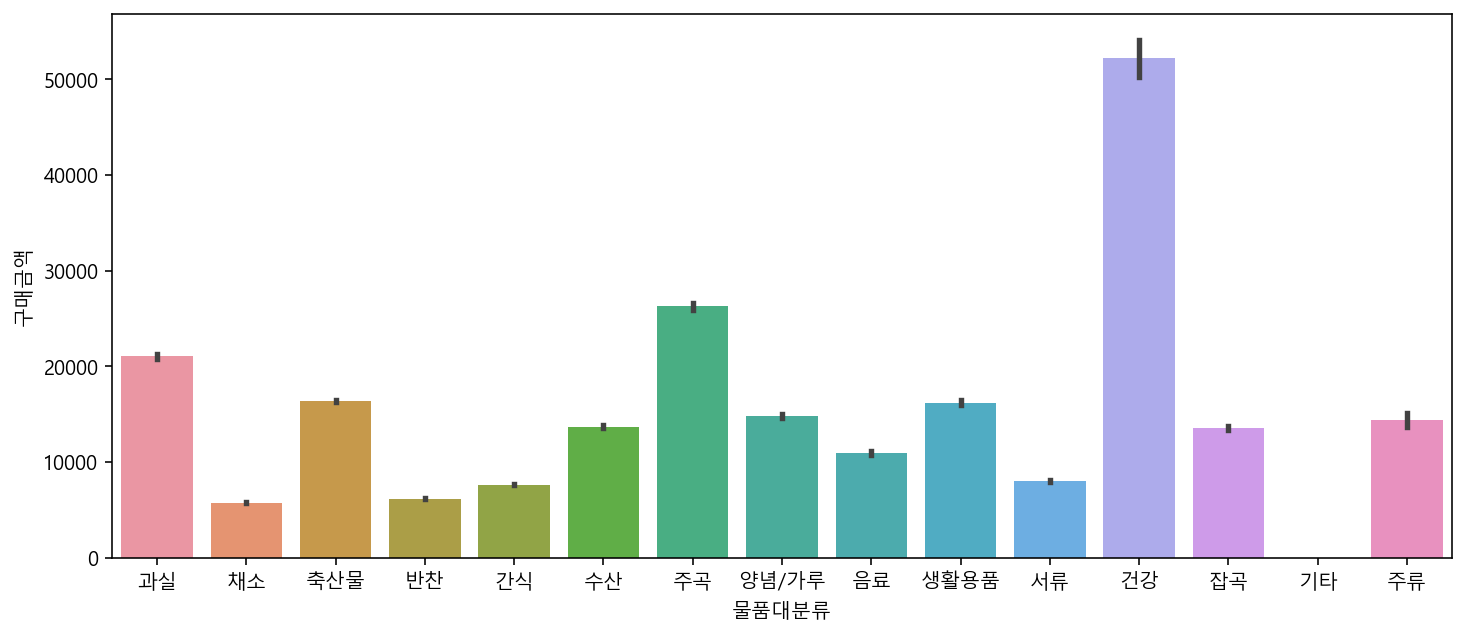

In [14]:
# 5번 문제
plt.figure(figsize = (12,5))
sns.barplot(data = df, x = '물품대분류', y = '구매금액')
plt.show()

In [21]:
# 6번 문제
def ftn1(x):
    return x[:2]

df['시간대'] = df['구매시각'].apply(ftn1)

In [26]:
tb1 = pd.pivot_table(data = df, index = '시간대', values = '구매금액', aggfunc = 'sum')

In [31]:
# 7번 문제
tb1 = tb1.reset_index()
tb1.head(3)

,시간대,구매금액
0,08,115342
1,09,10273517
2,10,934908001


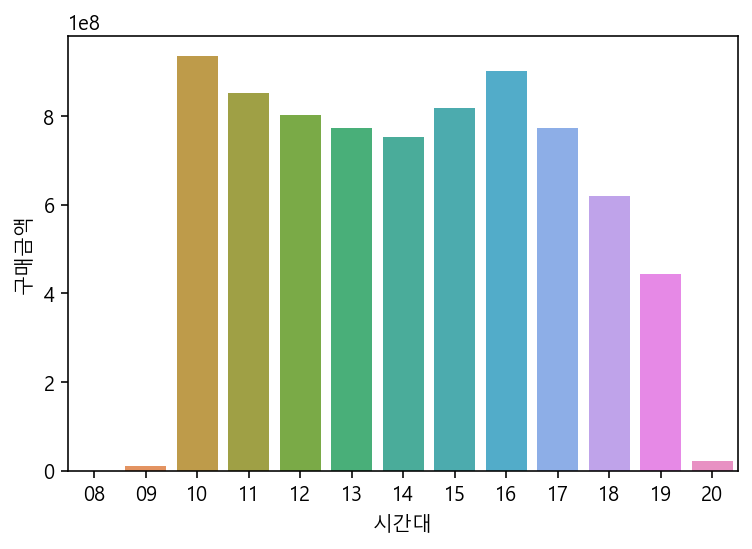

In [33]:
sns.barplot(data = tb1, x = '시간대', y = '구매금액')
plt.show()

In [35]:
# 8번 문제
df['구매금액'].describe()

count    7.055710e+05
mean     1.092004e+04
std      1.670323e+04
min     -6.662160e+05
25%      4.116000e+03
50%      7.275000e+03
75%      1.263500e+04
max      2.751014e+06
Name: 구매금액, dtype: float64

In [36]:
df_new = df[(df['구매금액'] >= 4.116000e+03) & (df['구매금액'] <= 1.263500e+04)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


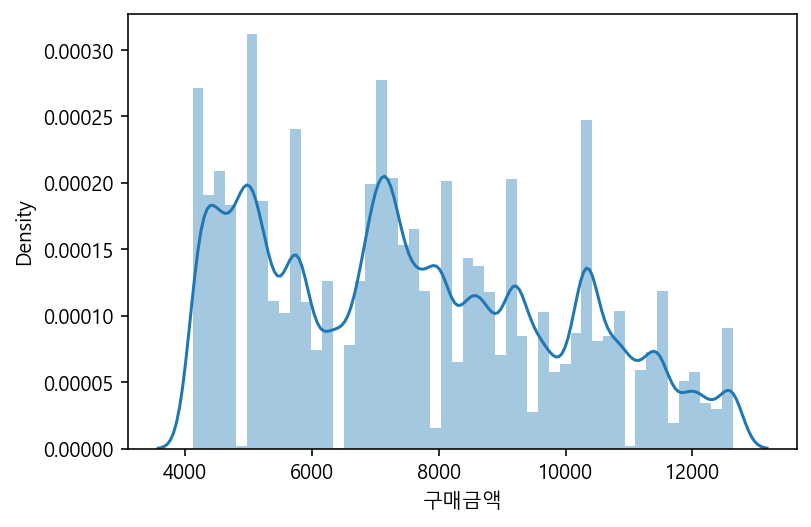

In [39]:
sns.distplot(df_new['구매금액'])
plt.show()

In [48]:
# 9번 문제

# 회원번호에 따른 방문일수 계산
df_freq = df[['회원번호','공급일자']].drop_duplicates()
result = df_freq.groupby('회원번호')['공급일자'].count().reset_index()
result = result.rename(columns = {'공급일자':'방문횟수'})
result.head(2)

,회원번호,방문횟수
0,18764160,12
1,18792000,1


In [50]:
# 회원번호에 따른 구매금액 계산
table = pd.pivot_table(data = df, index = '회원번호', values = '구매금액', aggfunc = 'sum').reset_index()
table.head()

,회원번호,구매금액
0,18764160,604284
1,18792000,70642
2,18942336,1010616
3,19391488,3159
4,19627200,4101241


In [51]:
# 데이터를 회원번호를 기준으로 합쳐주기
df_f = pd.merge(result, table, how = 'left', on = '회원번호')
df_f.head()

,회원번호,방문횟수,구매금액
0,18764160,12,604284
1,18792000,1,70642
2,18942336,7,1010616
3,19391488,1,3159
4,19627200,43,4101241


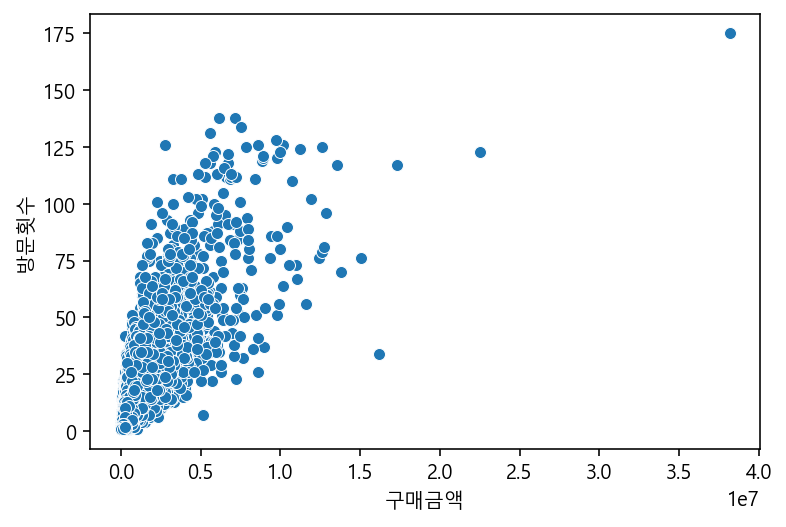

In [52]:
# 10번 문제
sns.scatterplot(data = df_f, x = '구매금액', y = '방문횟수')
plt.show()